**목표**

용봉은 승촌보 인근에 위치하고 있는데, 조류 발생 문제가 빈번하게 발생한다.
광주에서 나오는 하수처리장의 방류수가 하천 유량의 70% 정도가 되어 수질이 매우 안 좋으며
녹조도 많이 발생한다.

1. 조류 발생과 관련하여 조류(클로로필) 농도가 높게 나타나는 계절을 찾는다. 주로 여름철?
2. 조류 발생 관련 인자로 총질소, 총인, 온도 등 중에 어느 요인이 가장 중요한지 찾는다.
    현재 국내 정책은 총인의 농도가 가장 중요하다고 여기고 정책을 진행한다.
3. 보 건설에 따른 영향을 보고 싶지만 보 건설은 2011년에 했고, 
    수질 데이터는 2012년부터 공개가 되었어서 보 건설 전후로 설명은 어렵다.
    다만, 2017년부터 보개방을 시작했기에 수문 개방에 따른 수질 효과 분석은 가능하다.
4. 승촌보(용봉) 데이터와 하류에 있는 죽산보(나주) 측정망 자료를 이용하여
    상류와 하류의 비교도 진행한다.

**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정

**matplotlib 한글 설정**

- 운영체제에 따른 한글 지원 설정. 윈도우, 우분투, 구글 코랩 지원.
- 참고: [matplotlib에서 한글 지원하기](https://github.com/codingalzi/datapy/blob/master/matplotlib-korean.md)

In [6]:
import platform

if platform.system() == 'Windows': # 윈도우
    from matplotlib import font_manager, rc
    font_path = "C:/Windows/Fonts/NGULIM.TTF"
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font)
elif platform.system() == 'Linux': # 우분투 또는 구글 코랩
    # !sudo apt-get install -y fonts-nanum*
    # !fc-cache -fv
    
    applyfont = "NanumBarunGothic"
    import matplotlib.font_manager as fm
    if not any(map(lambda ft: ft.name == applyfont, fm.fontManager.ttflist)):
        fm.fontManager.addfont("/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")
    plt.rc("font", family=applyfont)
    plt.rc("axes", unicode_minus=False)
    

**데이터**

데이터는 연도별로 분리되어 있으며 원본 엑셀 파일은 아래 서버에 저장되어 있다.

In [3]:
base_url = "https://github.com/codingalzi/water-data/raw/master/reservoirs/"

**승촌보 (엑셀) 자료를 데이터프레임으로 불러오기**

- `skiprows=0`: 0번 행 무시. 모든 워크시트 대상.
- `header=1`: 1번 행을 header로 지정, 즉 열 인덱스로 사용.
- `sheet_name=None`: 모든 워크시트 가져오기. 워크시트별로 하나의 df 생성. 반환값은 사전.
- `na_values='ND'`: ND(No Data/Not Determinded) 또한 결측치로 처리. 용조산소 열에 포함되어 있음.
- `index_col=0`: 측정일을 행 인덱스로 사용
- `parse_dates=True`: 행 인덱스로 사용되는 날짜 대상 파싱 실행

주의: 아래 모듈을 먼저 설치해야 할 수도 있다.

```python
!pip install openpyxl
```

In [4]:
scb_yearly = pd.read_excel(base_url+"Seungchonbo.xlsx", 
                            skiprows=0, 
                            header=1, 
                            sheet_name=None,
                            na_values='ND',
                            index_col=0, 
                            parse_dates=True)

- 2012년부터 2022년까지의 데이터가 각각의 워크시트(worksheet)로 존재.
- 따라서 년도를 키로 갖는 사전 자료형으로 불러옴.
- 키값은 각각의 워크시트를 담은 데이터프레임.

In [5]:
type(scb_yearly)

dict

In [7]:
scb_yearly.keys()

dict_keys(['2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'])

**연도별 데이터 수**

- 2012년과 2022년 데이터 수는 크지 않음.


In [8]:
for year in scb_yearly:
    print(len(scb_yearly[year]))

4343
8750
8760
8739
8784
8730
8758
8760
8784
8760
3432


**2013년 데이터 정보 요약**

In [9]:
scb_yearly['2013년'].info

<bound method DataFrame.info of                     측정소명  수온 ℃  수소이온농도  전기전도도 μS/cm  용존산소 mg/L  총유기탄소 mg/L  \
측정일/월                                                                        
2013-01-01 00:00:00   용봉   3.9     6.9        374.0       11.4         2.5   
2013-01-01 01:00:00   용봉   3.9     6.9        375.0       11.4         2.5   
2013-01-01 02:00:00   용봉   4.0     6.9        374.0       11.4         2.5   
2013-01-01 03:00:00   용봉   4.1     6.9        375.0       11.4         2.5   
2013-01-01 04:00:00   용봉   4.0     6.9        380.0       11.3         2.6   
...                  ...   ...     ...          ...        ...         ...   
2013-12-31 19:00:00   용봉   6.1     6.7        414.0        8.0         3.9   
2013-12-31 20:00:00   용봉   6.1     6.7        416.0        7.8         3.8   
2013-12-31 21:00:00   용봉   6.1     6.7        416.0        7.9         3.5   
2013-12-31 22:00:00   용봉   5.9     6.7        413.0        8.3         3.5   
2013-12-31 23:00:00   용봉   5.8  

In [10]:
scb_yearly['2013년'].describe()

,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
count,8052.000000,8052.000000,8050.000000,7935.000000,8042.000000,5993.000000,6048.000000,7109.000000
mean,17.321436,6.987332,306.202360,6.767360,4.000037,4.665678,0.121389,45.495344
std,8.929434,0.540216,70.726738,3.853567,1.139817,1.371038,0.079755,37.615432
min,2.200000,6.300000,101.000000,0.500000,2.100000,1.929000,0.030000,2.600000
25%,8.700000,6.700000,258.000000,3.700000,3.200000,3.470000,0.066000,14.500000
50%,17.200000,6.800000,305.000000,6.300000,3.700000,4.704000,0.099000,37.700000
75%,25.400000,7.100000,359.000000,9.500000,4.600000,5.705000,0.146000,64.800000
max,36.100000,9.600000,456.000000,24.300000,19.300000,9.972000,0.745000,453.500000


**2013년 조류(클로로필 A) 데이터**

In [11]:
scb2013_CHLA = scb_yearly['2013년'].iloc[:, [-1]].copy()
scb2013_CHLA

,클로로필-a mg/㎥
측정일/월,
2013-01-01 00:00:00,7.2
2013-01-01 01:00:00,6.9
2013-01-01 02:00:00,6.8
2013-01-01 03:00:00,6.9
2013-01-01 04:00:00,6.9
...,...
2013-12-31 19:00:00,10.3
2013-12-31 20:00:00,9.9
2013-12-31 21:00:00,10.0


- 2013년 조류(클로로필 A) 결측치 수

In [12]:
scb2013_CHLA.isna().sum()

클로로필-a mg/㎥    1641
dtype: int64

- 2013년 조류(클로로필 A) 결측치 제거

In [13]:
scb2013_CHLA_wo_NA = scb2013_CHLA.dropna()

* 조류 변화 선그래프

<AxesSubplot:xlabel='측정일/월'>

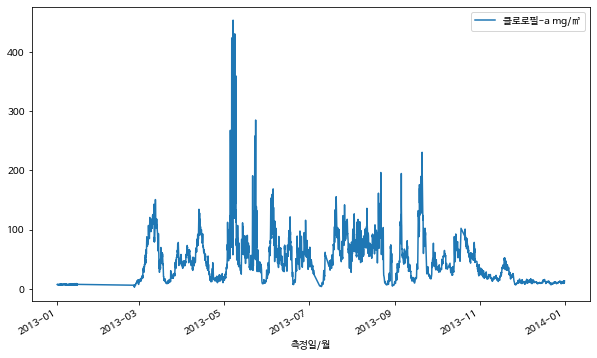

In [14]:
scb2013_CHLA_wo_NA.plot()

- 2013년 5월 7일, 14시에 가장 조류 가장 심함

In [15]:
scb2013_CHLA_wo_NA.idxmax()

클로로필-a mg/㎥   2013-05-07 14:00:00
dtype: datetime64[ns]

* 2013년 조류 기준 정렬

In [16]:
scb2013_CHLA_wo_NA.columns

Index(['클로로필-a mg/㎥'], dtype='object')

5월 7일 전후로 조류가 가장 심함.

In [17]:
scb2013_CHLA_wo_NA.sort_values('클로로필-a mg/㎥', ascending=False).head()

,클로로필-a mg/㎥
측정일/월,
2013-05-07 14:00:00,453.5
2013-05-08 18:00:00,430.4
2013-05-06 14:00:00,423.5
2013-05-08 19:00:00,416.0
2013-05-06 13:00:00,409.7


## 연도별 조류 최고점

In [18]:
for year in scb_yearly:
    scb_CHLA_year = scb_yearly[year].iloc[:, [-1]].copy()
    scb_CHLA_year_wo_NA = scb_CHLA_year.dropna()
    print(scb_CHLA_year_wo_NA.idxmax())

클로로필-a mg/㎥   2012-10-02 15:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2013-05-07 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2014-04-08 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2015-03-30 10:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2016-08-06 14:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2017-07-31 13:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2018-01-31 19:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2019-08-04 22:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2020-03-16 15:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2021-04-19 18:00:00
dtype: datetime64[ns]
클로로필-a mg/㎥   2022-04-04 18:00:00
dtype: datetime64[ns]


연도별로 조류 최고점 시기가 다른 이유를 찾아야 함.

- 첫째, 결측치 수와 연관되었을 수 있음.

## 연도별 결측치 수

In [19]:
for year in scb_yearly:
    scb_CHLA_year = scb_yearly[year].iloc[:, [-1]].copy()
    print(f"{year} 전체 데이터 수: {len(scb_CHLA_year)}")
    print(f"{year} 결측치 데이터 수: {scb_CHLA_year.isna().sum()}")

2012년 전체 데이터 수: 4343
2012년 결측치 데이터 수: 클로로필-a mg/㎥    2073
dtype: int64
2013년 전체 데이터 수: 8750
2013년 결측치 데이터 수: 클로로필-a mg/㎥    1641
dtype: int64
2014년 전체 데이터 수: 8760
2014년 결측치 데이터 수: 클로로필-a mg/㎥    618
dtype: int64
2015년 전체 데이터 수: 8739
2015년 결측치 데이터 수: 클로로필-a mg/㎥    323
dtype: int64
2016년 전체 데이터 수: 8784
2016년 결측치 데이터 수: 클로로필-a mg/㎥    598
dtype: int64
2017년 전체 데이터 수: 8730
2017년 결측치 데이터 수: 클로로필-a mg/㎥    1545
dtype: int64
2018년 전체 데이터 수: 8758
2018년 결측치 데이터 수: 클로로필-a mg/㎥    6720
dtype: int64
2019년 전체 데이터 수: 8760
2019년 결측치 데이터 수: 클로로필-a mg/㎥    3517
dtype: int64
2020년 전체 데이터 수: 8784
2020년 결측치 데이터 수: 클로로필-a mg/㎥    2930
dtype: int64
2021년 전체 데이터 수: 8760
2021년 결측치 데이터 수: 클로로필-a mg/㎥    1319
dtype: int64
2022년 전체 데이터 수: 3432
2022년 결측치 데이터 수: 클로로필-a mg/㎥    170
dtype: int64


## 조류 발생 관련 인자

결측치가 가장 적은 2015년 자료를 이용하여 조류 발생에 가장 큰 영향을 주는 요소를 확인한다.

In [20]:
scb2015 = scb_yearly['2015년'].copy()
scb2015

,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
측정일/월,,,,,,,,,
2015-01-01 00:00:00,용봉,6.3,7.0,410.0,9.2,2.5,5.607,0.057,3.9
2015-01-01 01:00:00,용봉,6.2,7.0,410.0,9.2,2.5,5.596,0.056,3.9
2015-01-01 02:00:00,용봉,6.1,7.0,409.0,9.2,2.4,5.485,0.053,3.7
2015-01-01 03:00:00,용봉,6.1,7.0,410.0,9.2,2.4,5.487,0.052,3.7
2015-01-01 04:00:00,용봉,6.0,7.0,412.0,9.3,2.4,5.625,0.052,3.8
...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,용봉,7.8,6.9,399.0,9.0,3.2,6.088,0.062,9.8
2015-12-31 20:00:00,용봉,7.7,6.9,401.0,9.0,3.3,6.052,0.056,9.4
2015-12-31 21:00:00,용봉,7.7,6.9,401.0,9.0,3.4,6.152,0.053,9.6


총 8739개의 샘플 중에서 평균 438개의 샘플이 결측치를 갖는다.

In [21]:
scb2015.isna().sum().mean()

437.55555555555554

결측치를 하나라도 갖고 있는 행은 모두 제거한다.

In [22]:
scb2015_wo_NA = scb2015.dropna()
scb2015_wo_NA

,측정소명,수온 ℃,수소이온농도,전기전도도 μS/cm,용존산소 mg/L,총유기탄소 mg/L,총질소 mg/L,총인 mg/L,클로로필-a mg/㎥
측정일/월,,,,,,,,,
2015-01-01 00:00:00,용봉,6.3,7.0,410.0,9.2,2.5,5.607,0.057,3.9
2015-01-01 01:00:00,용봉,6.2,7.0,410.0,9.2,2.5,5.596,0.056,3.9
2015-01-01 02:00:00,용봉,6.1,7.0,409.0,9.2,2.4,5.485,0.053,3.7
2015-01-01 03:00:00,용봉,6.1,7.0,410.0,9.2,2.4,5.487,0.052,3.7
2015-01-01 04:00:00,용봉,6.0,7.0,412.0,9.3,2.4,5.625,0.052,3.8
...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,용봉,7.8,6.9,399.0,9.0,3.2,6.088,0.062,9.8
2015-12-31 20:00:00,용봉,7.7,6.9,401.0,9.0,3.3,6.052,0.056,9.4
2015-12-31 21:00:00,용봉,7.7,6.9,401.0,9.0,3.4,6.152,0.053,9.6


In [23]:
scb2015_wo_NA.dtypes

측정소명            object
수온 ℃           float64
수소이온농도         float64
전기전도도 μS/cm    float64
용존산소 mg/L      float64
총유기탄소 mg/L     float64
총질소 mg/L       float64
총인 mg/L        float64
클로로필-a mg/㎥    float64
dtype: object

결측치가 없는 것을 확인한다.

In [24]:
scb2015_wo_NA.isna().sum().sum()

0

타깃 데이터셋으로 '클로로필-a mg/㎥' 열을 사용한다.

In [44]:
targets_scb2015_s = scb2015_wo_NA['클로로필-a mg/㎥'].astype('f4')

In [ ]:
targets_scb2015 = scb2015_wo_NA['클로로필-a mg/㎥'].astype('f4').to_numpy()

In [34]:
targets_scb2015

array([3.9, 3.9, 3.7, ..., 9.6, 9.6, 8.9], dtype=float32)

입력 데이터셋으로 '클로로필-a mg/㎥' 열과 '측정소명' 열을 제외한 나머지를 사용한다.

In [35]:
inputs_scb2015 = scb2015_wo_NA.iloc[:, 1:-1].astype('f4').to_numpy()
inputs_scb2015

array([[6.300e+00, 7.000e+00, 4.100e+02, ..., 2.500e+00, 5.607e+00,
        5.700e-02],
       [6.200e+00, 7.000e+00, 4.100e+02, ..., 2.500e+00, 5.596e+00,
        5.600e-02],
       [6.100e+00, 7.000e+00, 4.090e+02, ..., 2.400e+00, 5.485e+00,
        5.300e-02],
       ...,
       [7.700e+00, 6.900e+00, 4.010e+02, ..., 3.400e+00, 6.152e+00,
        5.300e-02],
       [7.600e+00, 6.900e+00, 4.010e+02, ..., 3.200e+00, 6.203e+00,
        5.200e-02],
       [7.600e+00, 6.900e+00, 4.030e+02, ..., 3.300e+00, 6.120e+00,
        5.200e-02]], dtype=float32)

### 랜덤 포레스트 활용

In [36]:
from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)

In [37]:
rnd_reg.fit(inputs_scb2015, targets_scb2015)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [45]:
scb2015_inputs = scb2015_wo_NA.iloc[:, 1:-1]

In [41]:
scb2015_inputs.columns

Index(['수온 ℃', '수소이온농도', '전기전도도 μS/cm', '용존산소 mg/L', '총유기탄소 mg/L', '총질소 mg/L',
       '총인 mg/L'],
      dtype='object')

In [46]:
rnd_reg.fit(scb2015_inputs, targets_scb2015_s)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                      random_state=42)

In [47]:
for score, name in zip(rnd_reg.feature_importances_, scb2015_inputs.columns):
    print(round(score, 2), name)

0.3 수온 ℃
0.48 수소이온농도
0.02 전기전도도 μS/cm
0.09 용존산소 mg/L
0.04 총유기탄소 mg/L
0.05 총질소 mg/L
0.02 총인 mg/L


In [43]:
rnd_reg.feature_importances_

array([0.30152097, 0.48446883, 0.01809752, 0.09372636, 0.03865583,
       0.04788953, 0.01564096])